In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Imported')

import warnings
warnings.filterwarnings('ignore')

Imported


# 1. Data Import and Preparation

In [2]:
df = pd.read_csv('train (1).csv')

In [3]:
df.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [4]:
df.shape

(27321, 80)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [6]:
df.isnull().sum()

UID                0
BLOCKID        27321
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          268
married          191
married_snp      191
separated        191
divorced         191
Length: 80, dtype: int64

### 1.1. Figure out the primary key and look for the requirement of indexing

In [7]:
df.set_index(keys=['UID'], inplace=True)
df.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


### 1.2. Missing Value Handling

In [8]:
# Check the percentage of missing values
# Exclude columns with no missing values

df.isnull().sum()[df.isnull().sum()>0]

BLOCKID                        27321
rent_mean                        314
rent_median                      314
rent_stdev                       314
rent_sample_weight               314
rent_samples                     314
rent_gt_10                       314
rent_gt_15                       314
rent_gt_20                       314
rent_gt_25                       314
rent_gt_30                       314
rent_gt_35                       314
rent_gt_40                       314
rent_gt_50                       314
hi_mean                          268
hi_median                        268
hi_stdev                         268
hi_sample_weight                 268
hi_samples                       268
family_mean                      298
family_median                    298
family_stdev                     298
family_sample_weight             298
family_samples                   298
hc_mortgage_mean                 573
hc_mortgage_median               573
hc_mortgage_stdev                573
h

In [9]:
# Drop some columns
df.drop(columns=['BLOCKID','SUMLEVEL'],inplace=True)
df.head()

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [10]:
# identify missing values columns
missing_values_columns = df.isnull().sum()[df.isnull().sum()>0].index
missing_values_columns

Index(['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_female', 'male_age_mean',
       'male_age_median', 'male_age_stdev', 'male_age_sample_weight',
       'male_age_samples', 'female_age_mean', 'female_age_median',
       'female_age_stdev', 'female_age_sample_weight',

In [11]:
# fill the missing values with mean
for col in missing_values_columns:
    df[col] = df[col].fillna(df[col].mean())
    
df.isnull().sum().any() # Check if there are any remaining missing values

False

# 2. Exploratory Data Analysis (EDA)

In [12]:
# filter the data
top_2500=df[(df['pct_own']>0.10) & (df['second_mortgage']<0.50)].sort_values(by='second_mortgage',ascending=False).head(2500)
[['place','pct_own','second_mortgage','lat','lng']]
top_2500.head()


,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
251185,27,25,Massachusetts,MA,Worcester,Worcester City,City,tract,1610,508,...,30.60147,26.16667,19.21553,262.09529,994.0,0.20247,0.37844,0.11976,0.09341,0.10539
269323,81,36,New York,NY,Corona,Harbor Hills,City,tract,11368,718,...,29.80694,27.66667,18.45616,448.69061,1932.0,0.15618,0.44490,0.14555,0.02357,0.04066
251324,3,24,Maryland,MD,Glen Burnie,Glen Burnie,CDP,tract,21061,410,...,32.53273,30.66667,19.61959,694.10357,2881.0,0.22380,0.58250,0.08321,0.00000,0.01778
235788,57,12,Florida,FL,Tampa,Egypt Lake-leto,City,tract,33614,813,...,34.53924,28.58333,18.56943,814.45000,2684.0,0.11618,0.36953,0.12876,0.09957,0.07339
242304,31,17,Illinois,IL,Chicago,Lincolnwood,Village,tract,60640,773,...,43.85811,39.83333,21.71686,374.52605,1802.0,0.14228,0.41366,0.13852,0.01771,0.09677


In [13]:
top_2500.shape

(2500, 77)

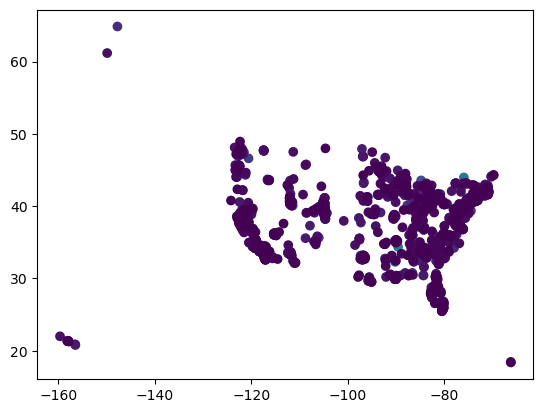

In [14]:
# Show GeoMap
plt.scatter(x=top_2500['lng'],y=top_2500['lat'],c=top_2500['second_mortgage'])
plt.show()


In [15]:
# create Bad dept
df['bad_debt']=df['second_mortgage']+df['home_equity']-df['home_equity_second_mortgage']
df['bad_debt']

UID
267822    0.09408
246444    0.04274
245683    0.09512
279653    0.01086
247218    0.05426
           ...   
279212    0.00000
277856    0.20908
233000    0.07857
287425    0.14305
265371    0.18362
Name: bad_debt, Length: 27321, dtype: float64

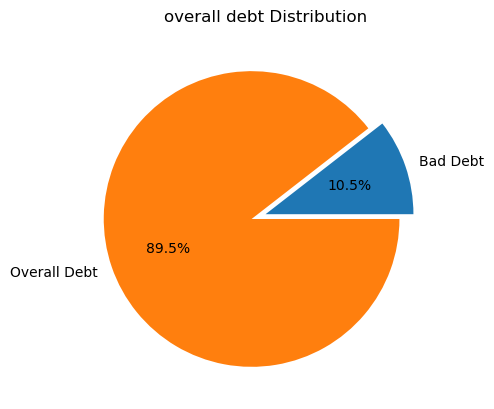

In [16]:
# create a pie chart for overall debt and bad debt
labels='Bad Debt','Overall Debt'
sizes=[df['bad_debt'].sum(),df['bad_debt'].count()-df['bad_debt'].sum()]
explode=(0,0.1)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%')
plt.title('overall debt Distribution')
plt.show()



### 2.1. City Wise Analysis

In [17]:
cols=['second_mortgage','home_equity','debt','bad_debt']
df_box_plt_Hamilton=df.loc[df['city']=='Hamilton']
df_box_plt_manhattan=df.loc[df['city']=='Manhattan']
df_box_city=pd.concat([df_box_plt_Hamilton,df_box_plt_manhattan],axis=0)
df_box_city.head()


,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt
UID,,,,,,,,,,,,,,,,,,,,,
267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,...,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408
263797,21,34,New Jersey,NJ,Hamilton,Yardville,City,tract,8610,609,...,55.00000,24.05831,732.58443,3124.0,0.64400,0.56377,0.01980,0.00990,0.04892,0.18071
270979,17,39,Ohio,OH,Hamilton,Hamilton City,Village,tract,45015,513,...,31.66667,22.66500,565.32725,2528.0,0.61278,0.47397,0.04419,0.02663,0.13741,0.15005
259028,95,28,Mississippi,MS,Hamilton,Hamilton,CDP,tract,39746,662,...,35.91667,22.79602,483.01311,1954.0,0.83241,0.58678,0.01052,0.00000,0.11721,0.02130
270984,17,39,Ohio,OH,Hamilton,New Miami,Village,tract,45013,513,...,52.33333,24.55724,682.81171,2912.0,0.63194,0.55697,0.01322,0.00000,0.15209,0.15651


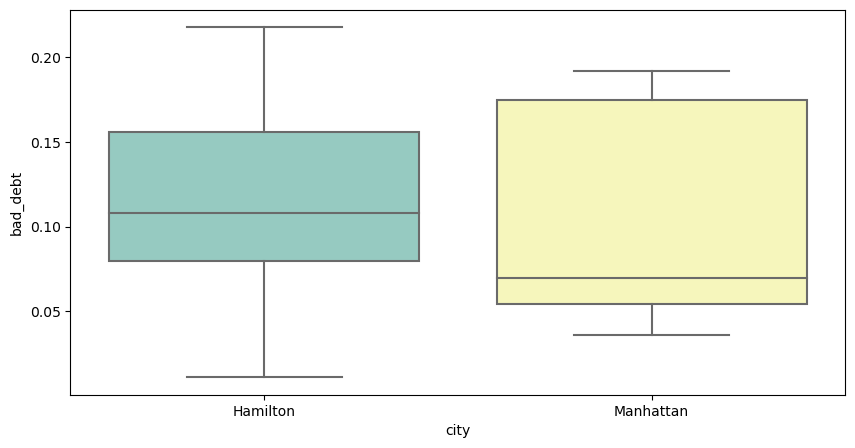

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x='city',y='bad_debt',data=df_box_city,palette='Set3')
plt.show()


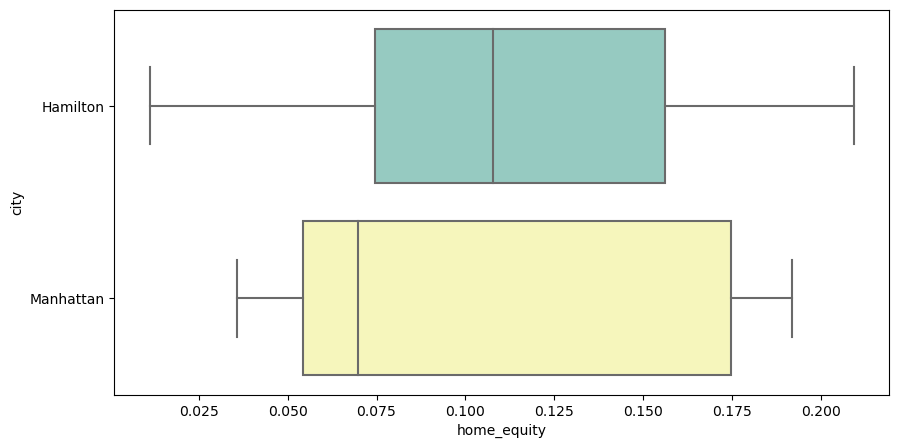

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(y='city',x='home_equity',data=df_box_city,palette='Set3')
plt.show()


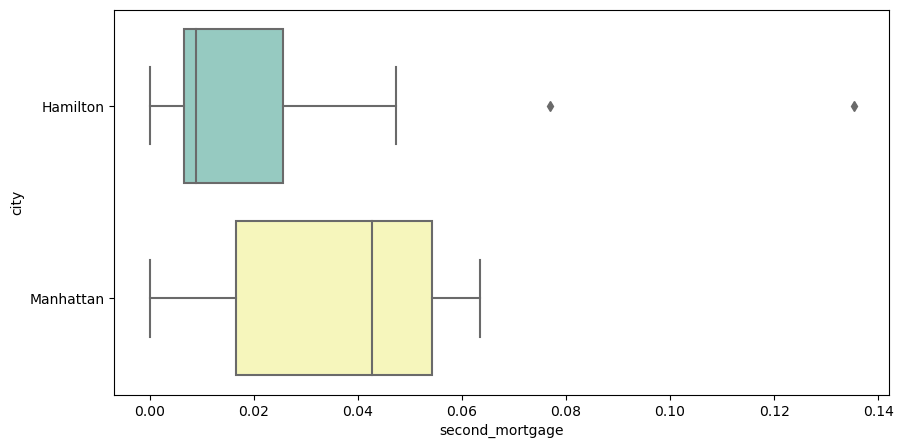

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(y='city',x='second_mortgage',data=df_box_city,palette='Set3')
plt.show()

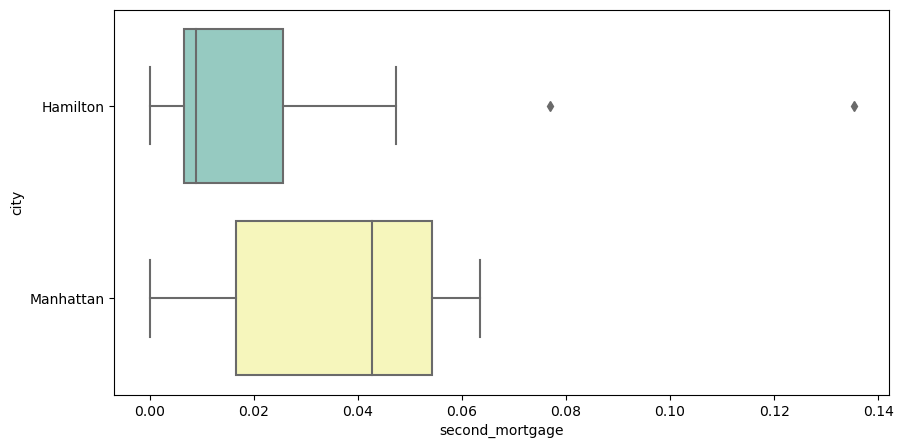

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(y='city',x='second_mortgage',data=df_box_city,palette='Set3')
plt.show()


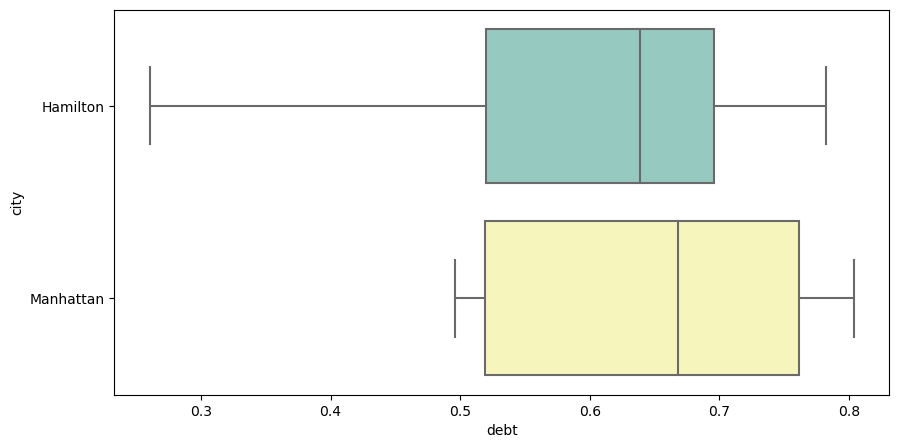

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(y='city',x='debt',data=df_box_city,palette='Set3')
plt.show()


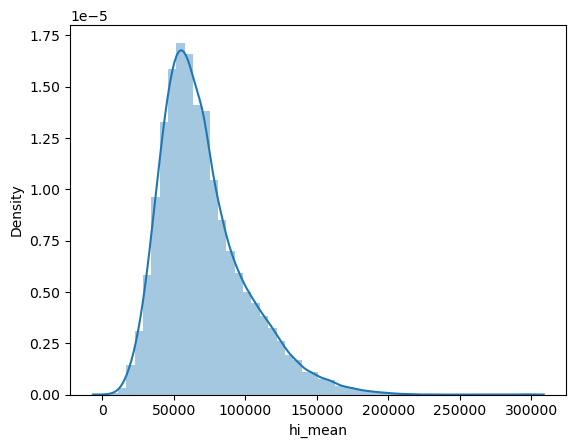

In [23]:
#creat some income chart
sns.distplot(df['hi_mean'])
plt.show()

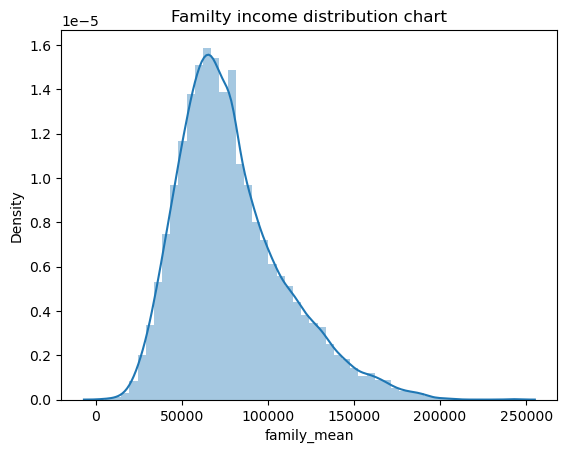

In [24]:
sns.distplot(df['family_mean'])
plt.title('Familty income distribution chart')
plt.show()


### 2.2. EDA - Age

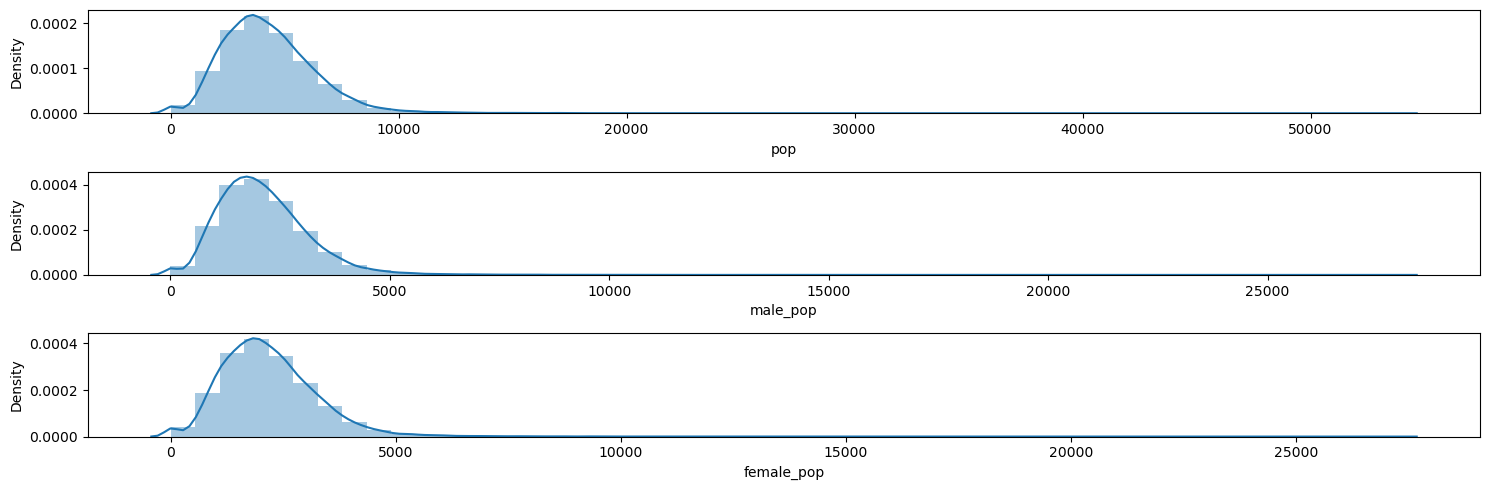

In [25]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(15,5))
sns.distplot(df['pop'],ax=ax1)
sns.distplot(df['male_pop'],ax=ax2)
sns.distplot(df['female_pop'],ax=ax3)
plt.subplots_adjust(hspace=0.5,wspace=0.8)
plt.tight_layout()
plt.show()


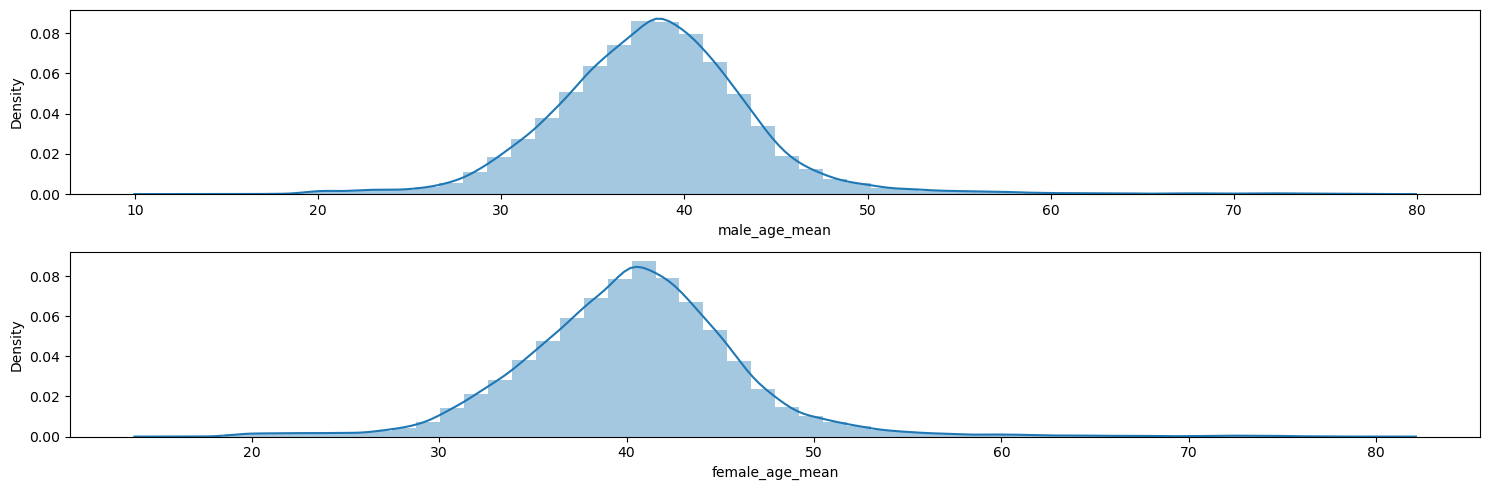

In [26]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,5))
sns.distplot(df['male_age_mean'],ax=ax1)
sns.distplot(df['female_age_mean'],ax=ax2)
plt.subplots_adjust(hspace=0.5,wspace=0.8)
plt.tight_layout()
plt.show()


In [27]:
# create new fielld Population density
df['pop_density']=df['pop']/df['ALand']
df['pop_density']


UID
267822    0.000026
246444    0.001687
245683    0.000099
279653    0.002442
247218    0.002207
            ...   
279212    0.002650
277856    0.000818
233000    0.000002
287425    0.000619
265371    0.000478
Name: pop_density, Length: 27321, dtype: float64

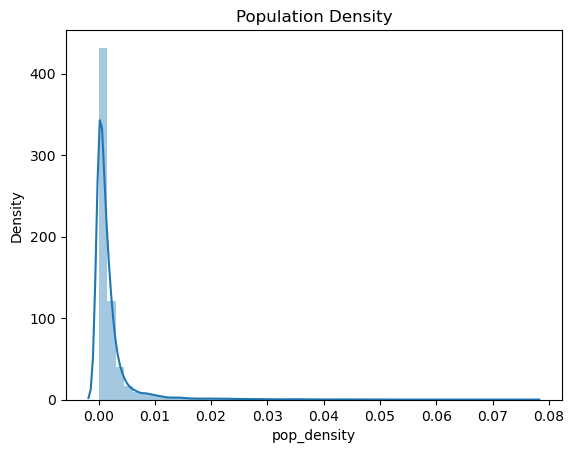

In [28]:
sns.distplot(df['pop_density'])
plt.title('Population Density')
plt.show()


In [29]:
df['age_median']=(df['male_age_median']+df['female_age_median'])/2
df['age_median']


UID
267822    44.666665
246444    34.791665
245683    41.833330
279653    49.750000
247218    22.000000
            ...    
279212    40.916670
277856    39.166665
233000    44.166665
287425    45.041670
265371    31.166665
Name: age_median, Length: 27321, dtype: float64

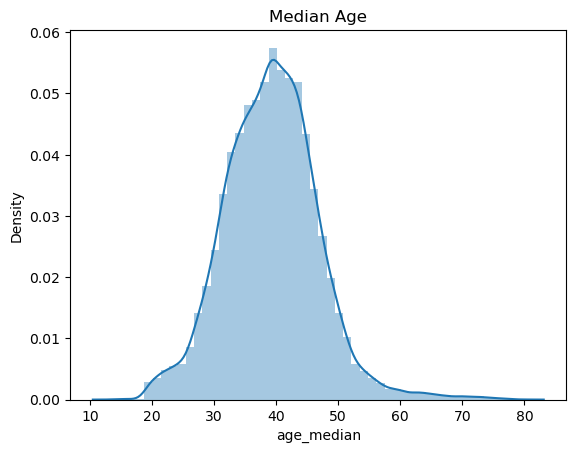

In [30]:
sns.distplot(df['age_median'])
plt.title('Median Age')
plt.show()


### 2.3. Create bins for population into a new variable

In [31]:
df['pop_bins']=pd.cut(df['pop'],bins=5,labels=['very low','low','medium','high','very high'])
df[['pop','pop_bins']]



,pop,pop_bins
UID,,
267822,5230,very low
246444,2633,very low
245683,6881,very low
279653,2700,very low
247218,5637,very low
...,...,...
279212,1847,very low
277856,4155,very low
233000,2829,very low


In [32]:
# For these population category , how many are married, divorced,separated
df.groupby(by='pop_bins')[['married','separated','divorced']].agg(['sum','mean','median'])


married                      separated                      \
                   sum      mean    median        sum      mean    median   
pop_bins                                                                    
very low   13733.22489  0.507548  0.524680  517.52126  0.019126  0.013650   
low          143.88385  0.584894  0.593135    3.89480  0.015833  0.011195   
medium         5.90163  0.655737  0.618710    0.04503  0.005003  0.004120   
high           3.52351  0.503359  0.335660    0.05699  0.008141  0.002500   
very high      0.73474  0.734740  0.734740    0.00405  0.004050  0.004050   

              divorced                      
                   sum      mean    median  
pop_bins                                    
very low   2719.430721  0.100504  0.096020  
low          18.535600  0.075348  0.070045  
medium        0.593340  0.065927  0.064890  
high          0.273210  0.039030  0.010320  
very high     0.030360  0.030360  0.030360

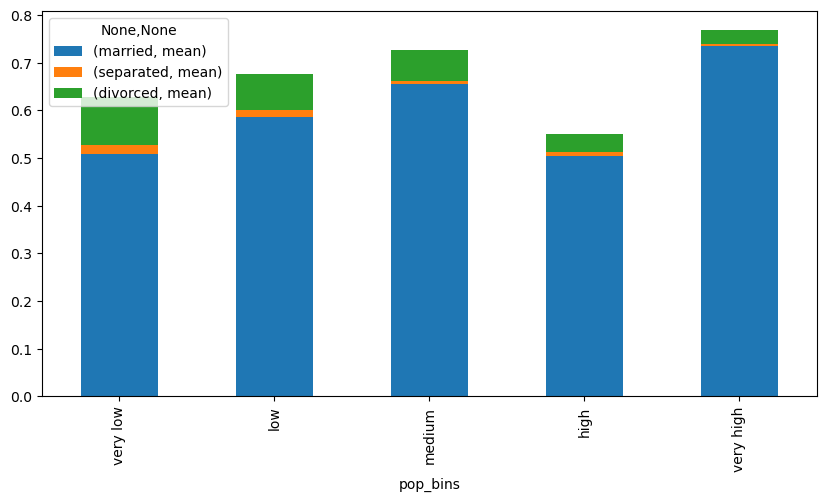

In [33]:
# visualize this analysis
pop_bins_analysis=df.groupby(by='pop_bins')[['married','separated','divorced']].agg(['mean'])
pop_bins_analysis.plot(figsize=(10,5),kind='bar',stacked=True)
plt.show()



In [34]:
# rent mean in every state
rent_state_mean=df.groupby(by='state')['rent_mean'].agg(['mean'])
rent_state_mean.head()


,mean
state,
Alabama,774.004927
Alaska,1185.763570
Arizona,1097.753511
Arkansas,720.918575
California,1471.133857


In [35]:
# rent mean in every state
family_state_mean=df.groupby(by='state')['family_mean'].agg(['mean'])
family_state_mean.head()


,mean
state,
Alabama,67030.064213
Alaska,92136.545109
Arizona,73328.238798
Arkansas,64765.377850
California,87655.470820


In [36]:
# calculate rent percentage of income
rent_perc_income=rent_state_mean['mean']/family_state_mean['mean']
rent_perc_income


state
Alabama                 0.011547
Alaska                  0.012870
Arizona                 0.014970
Arkansas                0.011131
California              0.016783
Colorado                0.013529
Connecticut             0.012637
Delaware                0.012929
District of Columbia    0.013198
Florida                 0.015772
Georgia                 0.013161
Hawaii                  0.018224
Idaho                   0.011957
Illinois                0.012620
Indiana                 0.012022
Iowa                    0.009940
Kansas                  0.011066
Kentucky                0.011068
Louisiana               0.012160
Maine                   0.011674
Maryland                0.013947
Massachusetts           0.012312
Michigan                0.012766
Minnesota               0.011058
Mississippi             0.012428
Missouri                0.011670
Montana                 0.010789
Nebraska                0.010912
Nevada                  0.015242
New Hampshire           0.011949
New 

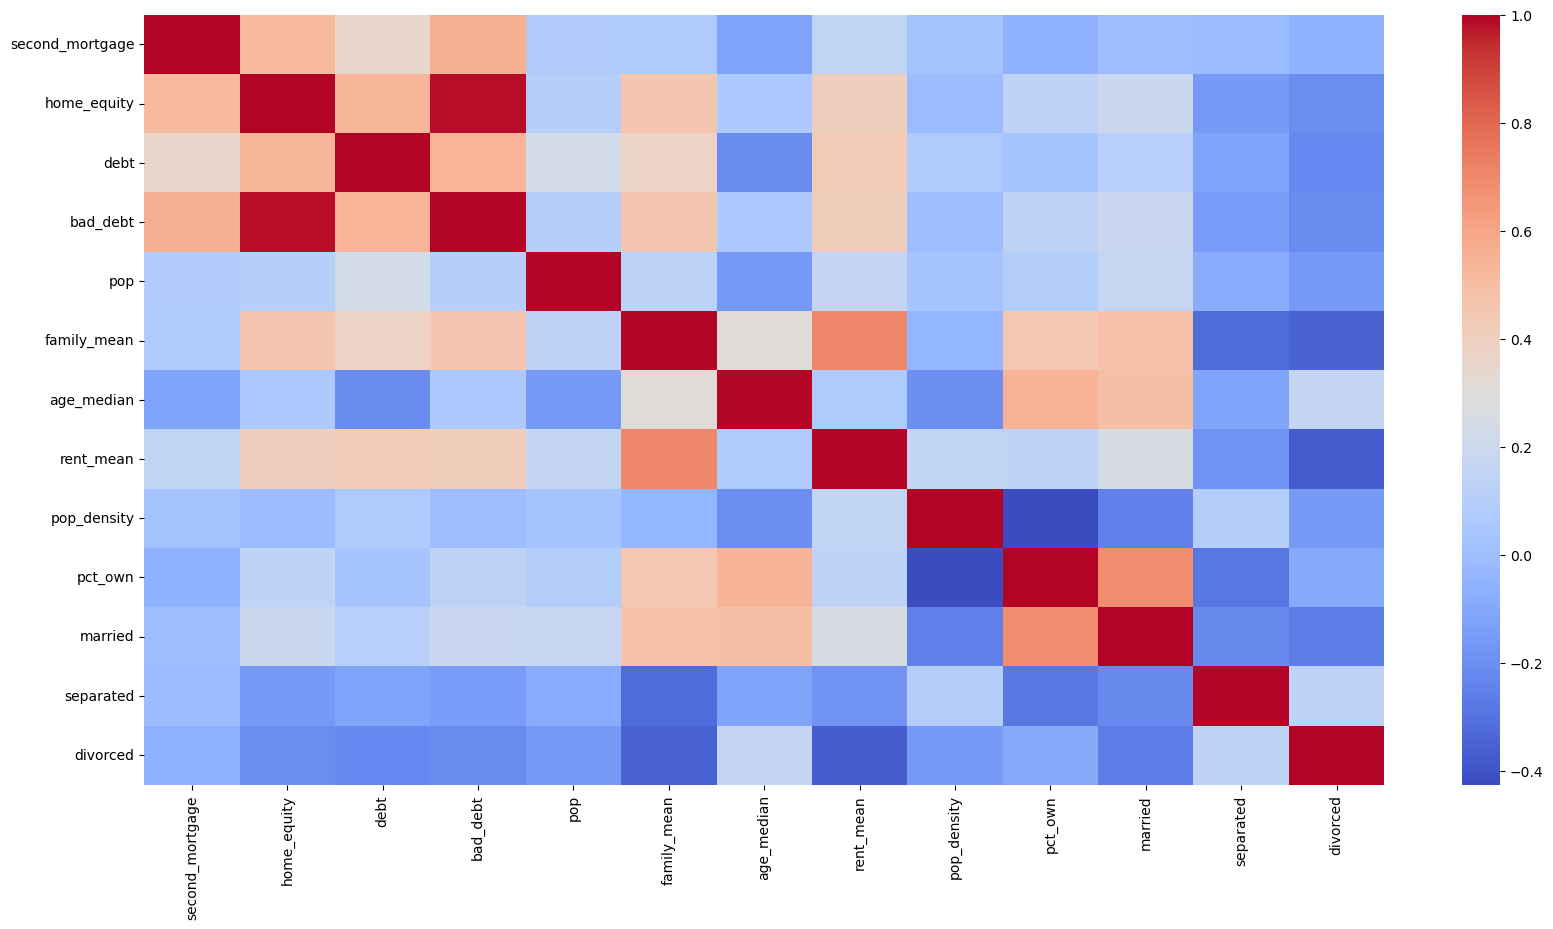

In [37]:
# Correlation Analysis with heatmap
cols=df[['second_mortgage','home_equity','debt','bad_debt','pop','family_mean','age_median','rent_mean','pop_density','pct_own','married','separated','divorced']].corr()
plt.figure(figsize=(20,10))
sns.heatmap(cols,cmap='coolwarm')
plt.show()


# 3. Data Preprocessing

In [38]:
!pip install factor_analyzer

In [39]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer


In [40]:
fa=FactorAnalyzer(n_factors=5)
fa.fit_transform(df.select_dtypes(exclude=('object','category')))
fa.loadings_

array([[-1.12589168e-01,  1.95646474e-02, -2.39331088e-02,
        -6.27632645e-02,  4.23474760e-02],
       [-1.10186763e-01,  1.33506219e-02,  2.79651249e-02,
        -1.49825865e-01,  1.10838809e-01],
       [-8.28678669e-02,  5.16372375e-02, -1.36451871e-01,
        -4.98918635e-02, -1.04024845e-01],
       [ 1.80961156e-02,  1.92013756e-02,  5.81329872e-03,
         2.64842748e-02, -6.12442393e-03],
       [ 9.02324703e-02, -9.72544309e-02, -6.54601319e-02,
        -1.33145902e-01, -1.48594605e-01],
       [-1.07335681e-02, -4.12376814e-02,  1.45853485e-01,
         8.80433354e-03,  1.08227569e-01],
       [-4.28796972e-02, -2.09780212e-02,  3.66726852e-02,
        -9.45597372e-02,  5.91380515e-02],
       [-2.44243021e-03, -1.53245408e-02, -2.68300881e-03,
        -4.52473039e-02,  2.37240654e-02],
       [ 7.92164326e-02,  9.57453312e-01, -8.71151658e-02,
        -6.59923876e-03, -3.97273205e-02],
       [ 7.39808208e-02,  9.18750523e-01, -1.08834842e-01,
        -2.79371589e-02

In [41]:
variance=fa.get_factor_variance()
variance

(array([12.25714177, 11.71417343,  8.54733399,  6.05053045,  5.46398242]),
 array([0.16563705, 0.15829964, 0.11550451, 0.08176392, 0.0738376 ]),
 array([0.16563705, 0.32393669, 0.43944121, 0.52120513, 0.59504273]))

# 4. Data Modeling: Linear Regression

In [42]:
df.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [43]:
df['type'].unique()

array(['City', 'Urban', 'Town', 'CDP', 'Village', 'Borough'], dtype=object)

In [44]:
type_dict={'type':{'City':1,'Urban':2,'CDP':3,'Village':4,'Borough':5,'Town':6}}
type_dict


{'type': {'City': 1,
  'Urban': 2,
  'CDP': 3,
  'Village': 4,
  'Borough': 5,
  'Town': 6}}

In [45]:
df.replace(type_dict,inplace=True)
df['type'].unique()

array([1, 2, 6, 3, 4, 5], dtype=int64)

In [46]:
feature_cols=['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']

df[feature_cols]

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,age_median,pct_own,married,separated,divorced
UID,,,,,,,,,,,,,,,
267822,53,36,13346,1,5230,67994.14790,0.02077,0.08919,0.52963,0.89288,44.666665,0.79046,0.57851,0.01240,0.08770
246444,141,18,46616,1,2633,50670.10337,0.02222,0.04274,0.60855,0.90487,34.791665,0.52483,0.34886,0.01426,0.09030
245683,63,18,46122,1,6881,95262.51431,0.00000,0.09512,0.73484,0.94288,41.833330,0.85331,0.64745,0.01607,0.10657
279653,127,72,927,2,2700,56401.68133,0.01086,0.01086,0.52714,0.91500,49.750000,0.65037,0.47257,0.02021,0.10106
247218,161,20,66502,1,5637,54053.42396,0.05426,0.05426,0.51938,1.00000,22.000000,0.13046,0.12356,0.00000,0.03109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279212,43,72,769,2,1847,20889.14617,0.00000,0.00000,0.11694,0.60155,40.916670,0.60422,0.24603,0.02249,0.14683
277856,91,42,19422,5,4155,118896.06830,0.02112,0.19641,0.65364,0.95737,39.166665,0.68072,0.61127,0.02473,0.04888
233000,87,8,80653,1,2829,88878.57034,0.02024,0.07857,0.58095,0.93555,44.166665,0.78508,0.70451,0.00520,0.07712


In [47]:
# create independent and dependent feature
X=df[feature_cols]
y=df['hc_mortgage_mean']

In [48]:
# spilt the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
# print shape of data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21856, 15)
(5465, 15)
(21856,)
(5465,)


In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [51]:
# Model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [52]:
# prediction
y_pred=lr.predict(X_test)
y_pred

array([1125.82313165, 1555.7441516 , 1870.51596559, ..., 2901.58600953,
       1324.46562642, 1670.56168913])

In [53]:
# calculate the errors
from sklearn.metrics import mean_squared_error,r2_score
print('Overall R2 score',r2_score(y_test,y_pred))
print('Overall Root mean square error is', np.sqrt(mean_squared_error(y_test,y_pred)))

Overall R2 score 0.747696234722105
Overall Root mean square error is 309.1910077335513


In [54]:
# Run another model at State level
# There are 52 states in USA

state=df['STATEID'].unique()
state

array([36, 18, 72, 20,  1, 48, 45,  6,  5, 24, 17, 19, 47, 32, 22,  8, 44,
       28, 34, 41,  4, 12, 55, 42, 37, 51, 26, 39, 40, 13, 16, 46, 27, 29,
       53, 56,  9, 54, 21, 25, 11, 15, 30,  2, 33, 49, 50, 31, 38, 35, 23,
       10], dtype=int64)

In [55]:
# State level model
for i in [20,1,45]:
    print("State ID-",i)
   
    x_train_nation=df[df['COUNTYID']==i][feature_cols]
    y_train_nation=df[df['COUNTYID']==i]['hc_mortgage_mean']
   
    x_test_nation=df[df['COUNTYID']==i][feature_cols]
    y_test_nation=df[df['COUNTYID']==i]['hc_mortgage_mean']
   
    x_train_scaled_nation=sc.fit_transform(x_train_nation)
    x_test_scaled_nation=sc.fit_transform(x_test_nation)
   
    lr.fit(x_train_scaled_nation,y_train_nation)
    y_pred_nation=lr.predict(x_test_scaled_nation)
   
    print("Overall R2 score of linear regression model for state,",i,":-" ,r2_score(y_test_nation,y_pred_nation))
    print("Overall RMSE of linear regression model for state,",i,":-" ,np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
    print("\n")


State ID- 20
Overall R2 score of linear regression model for state, 20 :- 0.8910120779820697
Overall RMSE of linear regression model for state, 20 :- 113.00713416809744


State ID- 1
Overall R2 score of linear regression model for state, 1 :- 0.826779252423208
Overall RMSE of linear regression model for state, 1 :- 289.856118451127


State ID- 45
Overall R2 score of linear regression model for state, 45 :- 0.7941544576082663
Overall RMSE of linear regression model for state, 45 :- 213.44890837280943


